In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
stock_list = [3.5, 5, 2, 8, 4.2]
returns = np.array(stock_list)
print returns, type(returns)

[ 3.5  5.   2.   8.   4.2] <type 'numpy.ndarray'>


In [3]:
A = np.array([[1, 2], [3, 4]])
print A, type(A)

[[1 2]
 [3 4]] <type 'numpy.ndarray'>


In [4]:
print A.shape

(2, 2)


In [5]:
print returns[0], returns[len(returns) - 1]

3.5 4.2


In [7]:
print returns[1:3]
print A[:, 0]
print A[0, :]
print type(A[0,:])
print A[0]
print A[1, 1]

[ 5.  2.]
[1 3]
[1 2]
<type 'numpy.ndarray'>
[1 2]
4


In [8]:
print np.log(returns)

[ 1.25276297  1.60943791  0.69314718  2.07944154  1.43508453]


In [10]:
print np.mean(returns)
print np.max(returns)

4.54
8.0


In [11]:
returns*2 + 5

array([ 12. ,  15. ,   9. ,  21. ,  13.4])

In [12]:
print "Mean: ", np.mean(returns), "Std Dev: ", np.std(returns)

Mean:  4.54 Std Dev:  1.99158228552


In [13]:
N = 10
assets = np.zeros((N, 100))
returns = np.zeros((N, 100))

In [14]:
R_1 = np.random.normal(1.01, 0.03, 100)
returns[0] = R_1
assets[0] = np.cumprod(R_1)

In [15]:
for i in range(1, N):
    R_i = R_1 + np.random.normal(0.001, 0.02, 100)
    returns[i] = R_i 
    assets[i] = np.cumprod(R_i)
    
mean_returns = [(np.mean(R) - 1)*100 for R in returns]
return_volatilities = [np.std(R) for R in returns]

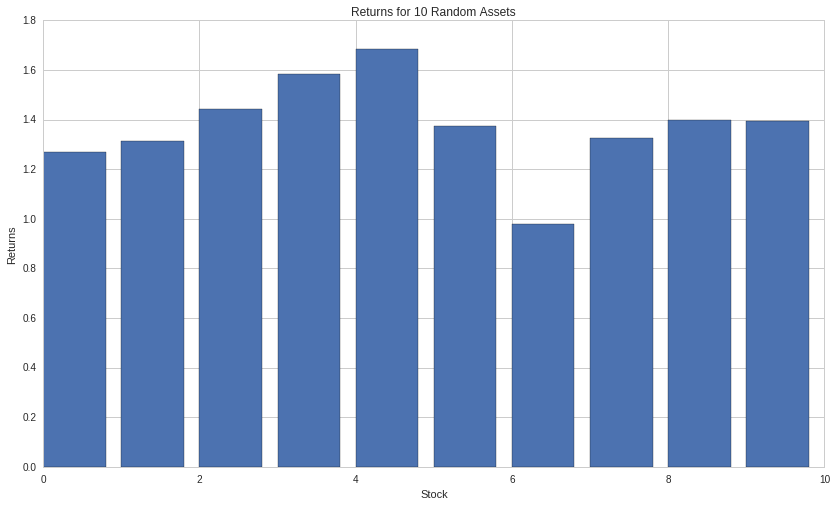

In [16]:
plt.bar(np.arange(len(mean_returns)), mean_returns)
plt.xlabel('Stock')
plt.ylabel('Returns')
plt.title('Returns for {0} Random Assets'.format(N));

In [17]:
weights = np.random.uniform(0, 1, N)
weights = weights/np.sum(weights)

In [18]:
p_returns = np.dot(weights, mean_returns)
print "Expected return of the portfolio: ", p_returns

Expected return of the portfolio:  1.29990086146


In [19]:
v = np.array([1, 2, np.nan, 4, 5])
print v

[  1.   2.  nan   4.   5.]


In [20]:
print np.mean(v)

nan


In [21]:
np.isnan(v)

array([False, False,  True, False, False], dtype=bool)

In [22]:
ix = ~np.isnan(v)
print v[ix]

[ 1.  2.  4.  5.]


In [23]:
print np.mean(v[ix])

3.0


In [24]:
print np.nanmean(v)

3.0


In [25]:
A = np.array([
        [1, 2, 3, 12, 6],
        [4, 5, 6, 15, 20],
        [7, 8, 9, 10, 10]        
    ])
B = np.array([
        [4, 4, 2],
        [2, 3, 1],
        [6, 5, 8],
        [9, 9, 9]
    ])

In [26]:
print np.dot(A, B)

ValueError: shapes (3,5) and (4,3) not aligned: 5 (dim 1) != 4 (dim 0)

In [27]:
print np.dot(B, A)

[[ 34  44  54 128 124]
 [ 21  27  33  79  82]
 [ 82 101 120 227 216]
 [108 135 162 333 324]]


In [28]:
cov_mat = np.cov(returns)
print cov_mat

[[ 0.00072776  0.00073053  0.00070883  0.00072834  0.00077589  0.00069981
   0.00076578  0.00060876  0.00068574  0.00081398]
 [ 0.00073053  0.00117169  0.0006491   0.00072816  0.00080344  0.00074216
   0.00082715  0.00061599  0.0006867   0.00078708]
 [ 0.00070883  0.0006491   0.00115194  0.00080602  0.00067868  0.0006784
   0.00077538  0.00062102  0.00069878  0.00080116]
 [ 0.00072834  0.00072816  0.00080602  0.0011571   0.000852    0.00073935
   0.00068815  0.00058243  0.00068822  0.00083877]
 [ 0.00077589  0.00080344  0.00067868  0.000852    0.00134658  0.00075907
   0.0008713   0.00057417  0.00067303  0.00085089]
 [ 0.00069981  0.00074216  0.0006784   0.00073935  0.00075907  0.00108717
   0.00073146  0.00054158  0.00072692  0.00075688]
 [ 0.00076578  0.00082715  0.00077538  0.00068815  0.0008713   0.00073146
   0.00119121  0.00064872  0.00071535  0.00084648]
 [ 0.00060876  0.00061599  0.00062102  0.00058243  0.00057417  0.00054158
   0.00064872  0.00090025  0.00057109  0.00068617]
 

In [29]:
print A
print np.transpose(A)

[[ 1  2  3 12  6]
 [ 4  5  6 15 20]
 [ 7  8  9 10 10]]
[[ 1  4  7]
 [ 2  5  8]
 [ 3  6  9]
 [12 15 10]
 [ 6 20 10]]


In [30]:
var_p = np.dot(np.dot(weights, cov_mat), weights.T)
vol_p = np.sqrt(var_p)
print "Portfolio volatility: ", vol_p

Portfolio volatility:  0.0274564407084


In [31]:
vol_p_alt = np.sqrt(np.var(np.dot(weights, returns), ddof=1))
print "Portfolio volatility: ", vol_p_alt

Portfolio volatility:  0.0274564407084
